In [1]:
from JupyterImport import *
root_logger.setLevel(logging.WARNING)

## Square Entropy Dats with balancing square wave and perp field
i.e. current bias through HQPC and opposite voltage bias in channel to keep dot a zero potential

and 100mT perp field which was left on by accident...

In [2]:
from src.DatObject.Attributes.SquareEntropy import plot_square_entropy
import src.DatObject.Attributes.SquareEntropy as SE

In [3]:
dats = get_dats(range(410, 417+1))
for dat in dats:
    dat.SquareEntropy.Processed.plot_info.show = SE.ShowPlots(info=True, raw=True, averaged=True, entropy=True)

# %matplotlib inline
# for dat in dats:
#     plot_square_entropy(dat.SquareEntropy.Processed)

Checked all dats in this series and they all look very similar, here is one below as an example

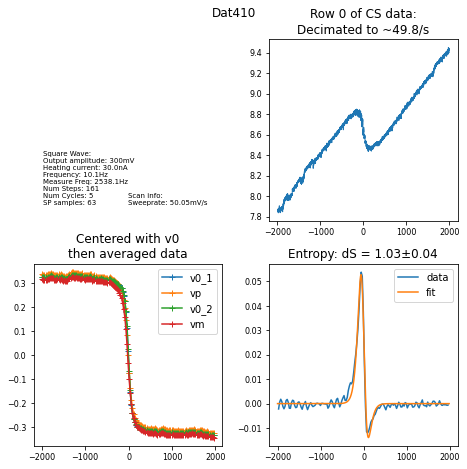

In [4]:
dat = dats[0]
plot_square_entropy(dat.SquareEntropy.Processed)
fig = plt.gcf()
fig.suptitle(f'Dat{dat.datnum}');

Now Entropy is coming out ~1... This is with 100mT field (accidentally), and with second square wave being output to set zero potential in channel

For comparison, below is similar gate setup, but with no field, and no balancing potential in the main channel. 

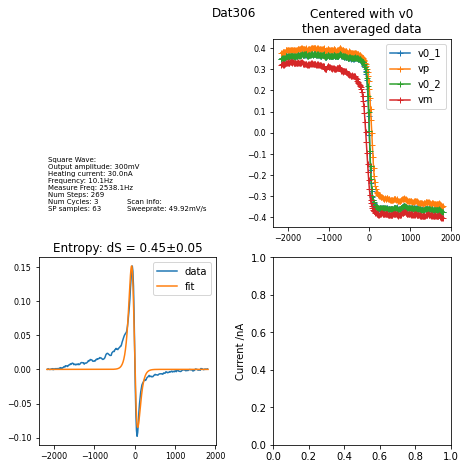

In [5]:
dat = get_dat(306)
plot_square_entropy(dat.SquareEntropy.Processed)
fig = plt.gcf()
fig.suptitle(f'Dat{dat.datnum}');

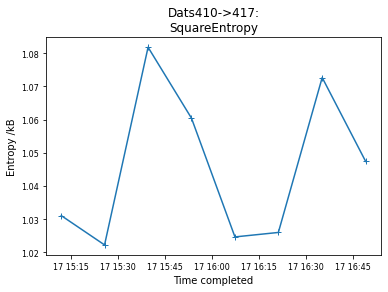

In [6]:
entropies = [dat.SquareEntropy.Processed.outputs.entropy_fit.best_values.dS for dat in dats]
times = [pd.Timestamp(dat.Logs.time_completed) for dat in dats]

fig, ax = plt.subplots(1,1)

ax.plot(times, entropies, marker='+')
P.ax_setup(ax, f'Dats{dats[0].datnum}->{dats[-1].datnum}:\nSquareEntropy', f'Time completed', f'Entropy /kB')

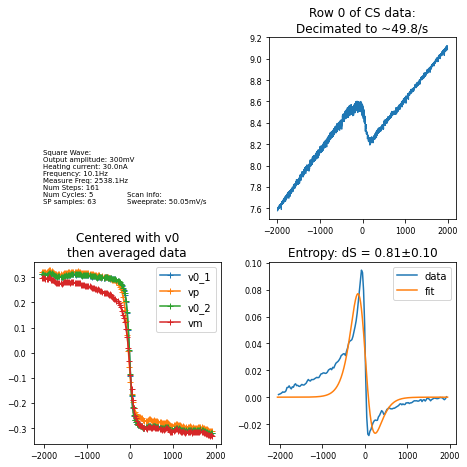

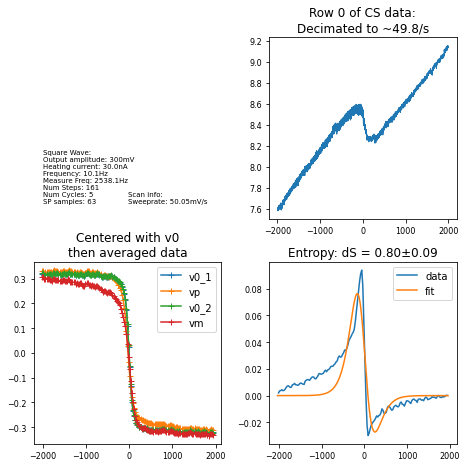

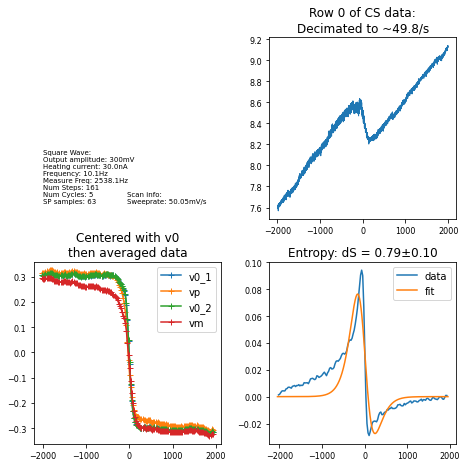

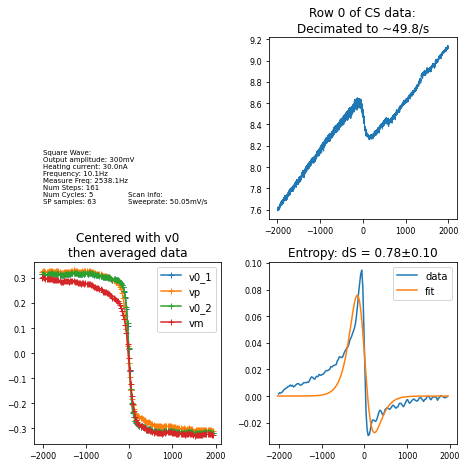

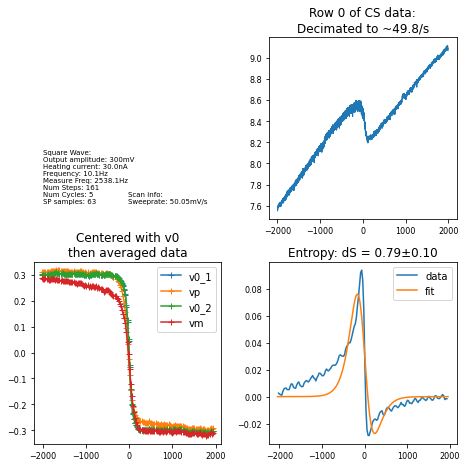

In [7]:
dats = get_dats(range(418, 422+1))
for dat in dats:
    dat.SquareEntropy.Processed.plot_info.show = SE.ShowPlots(info=True, raw=True, averaged=True, entropy=True)

%matplotlib inline
for dat in dats:
    plot_square_entropy(dat.SquareEntropy.Processed)

In [42]:
dats = get_dats(range(423, 448))
from src.DataStandardize.ExpSpecific.Aug20 import Fixes
for dat in dats:
    Fixes._add_magy(dat)  # Adds temporary magy field to Other.magy

In [43]:
dss = [dat.SquareEntropy.Processed.outputs.entropy_fit.best_values.dS for dat in dats]
times = [pd.Timestamp(dat.Logs.time_completed) for dat in dats]

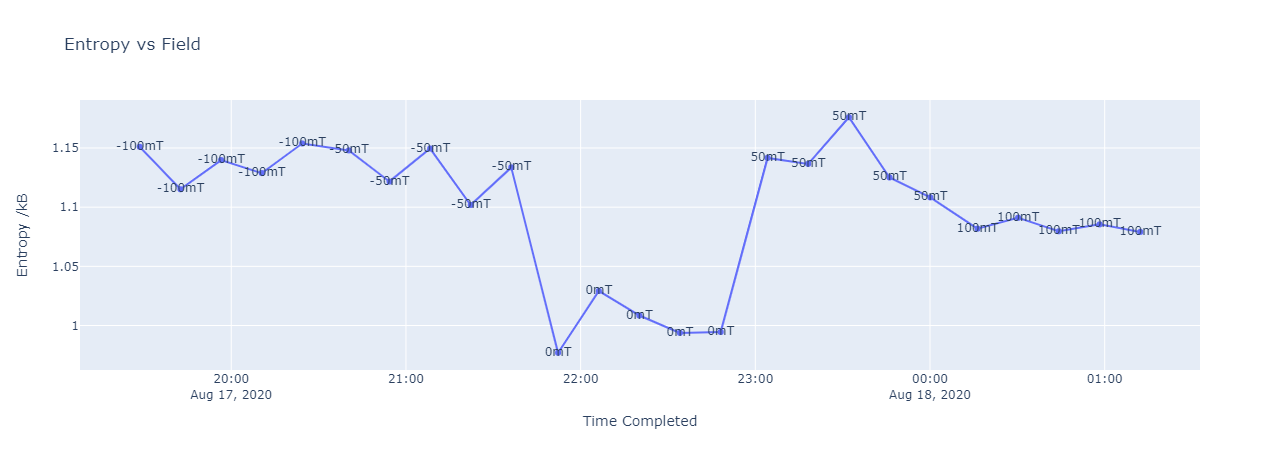

In [44]:
import plotly.express as px
fig = px.line(x=times, y=dss, labels={'x': 'Time Completed', 'y': 'Entropy /kB'}, title='Entropy vs Field', text=[f'{dat.Other.magy.field:.0f}mT' for dat in dats])
fig


D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Plotting\Mpl\PlotUtil.py:140: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



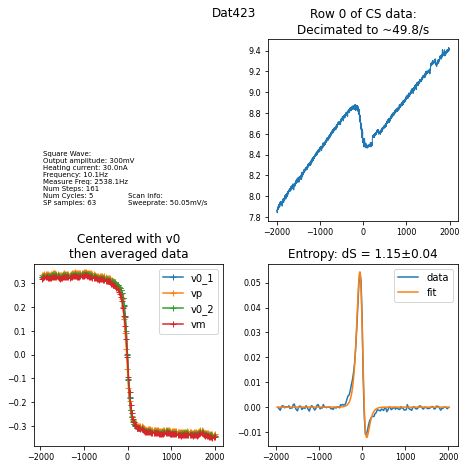

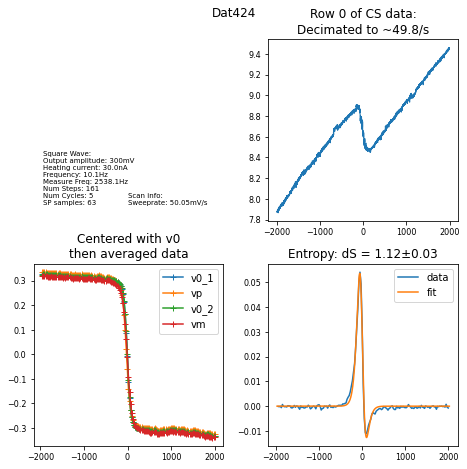

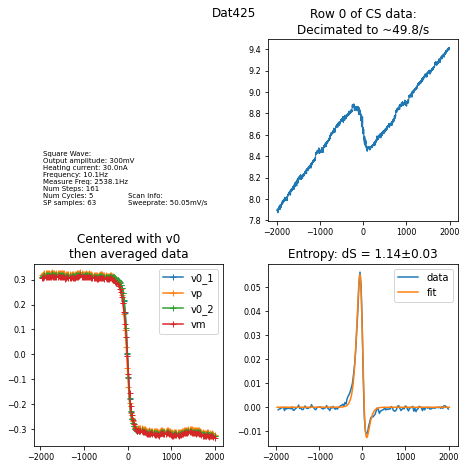

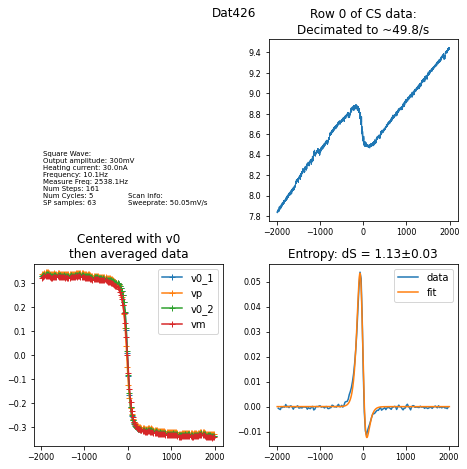

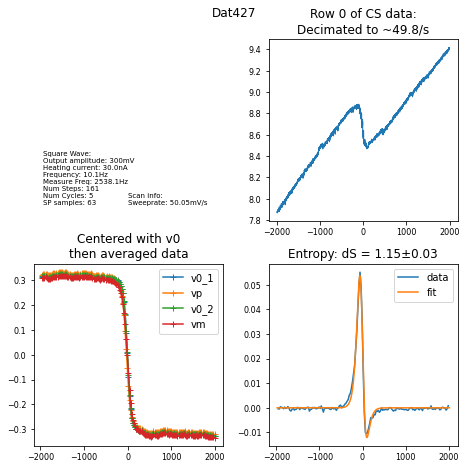

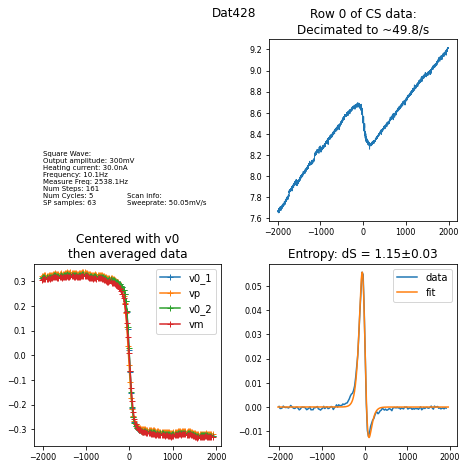

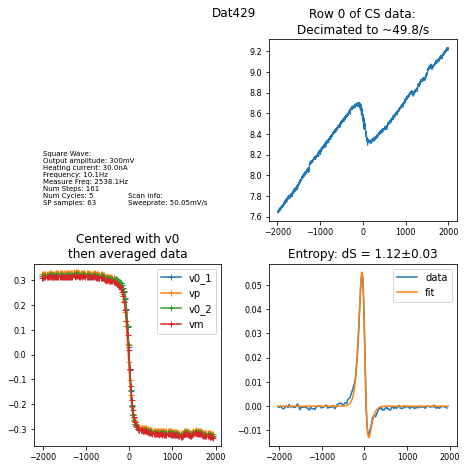

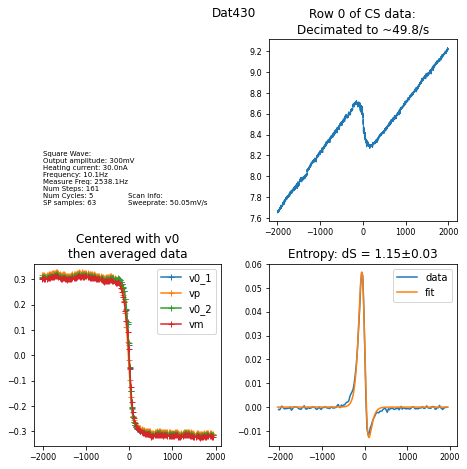

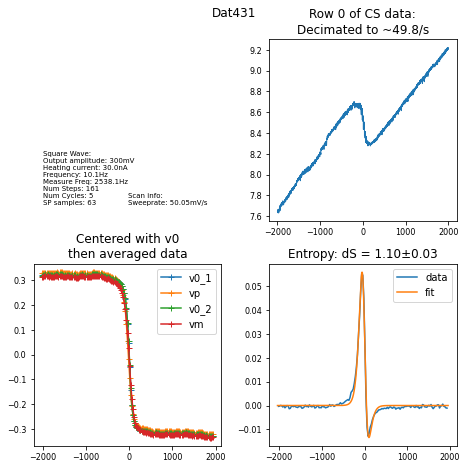

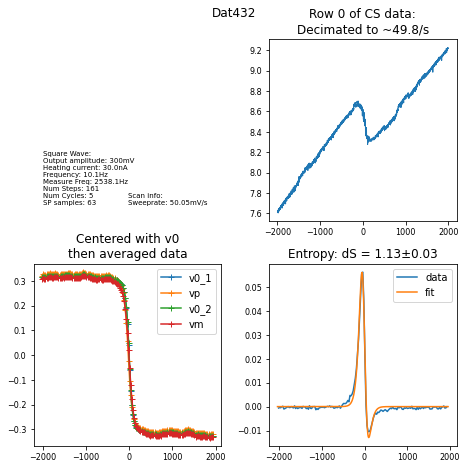

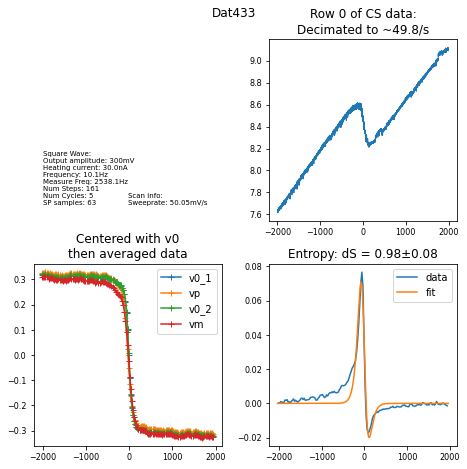

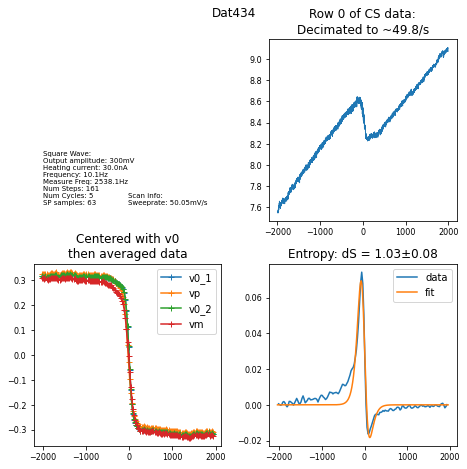

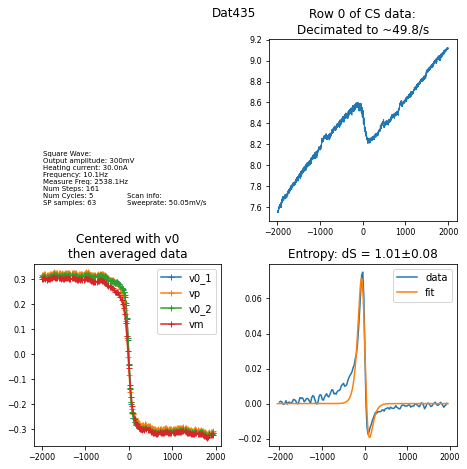

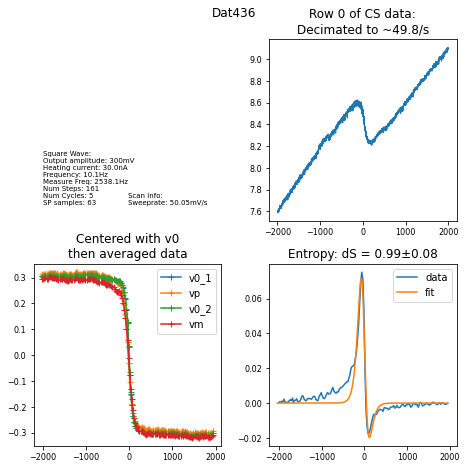

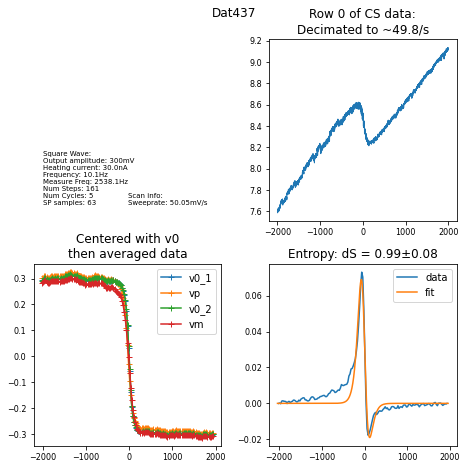

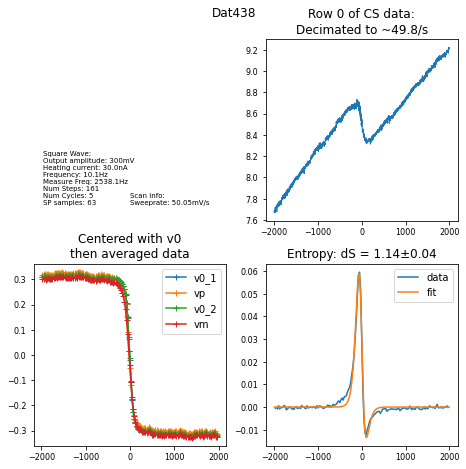

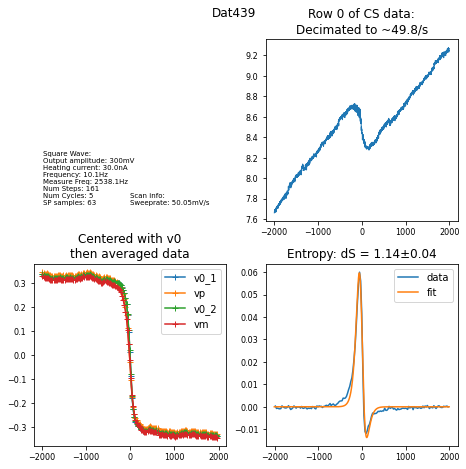

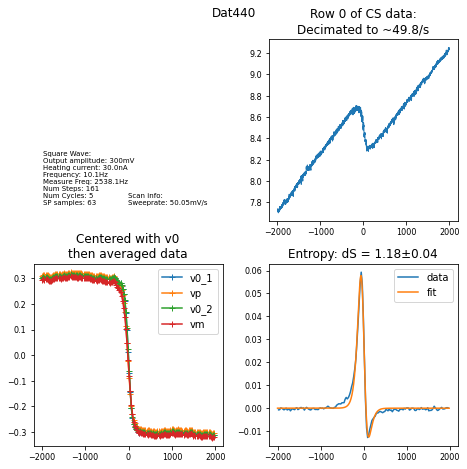

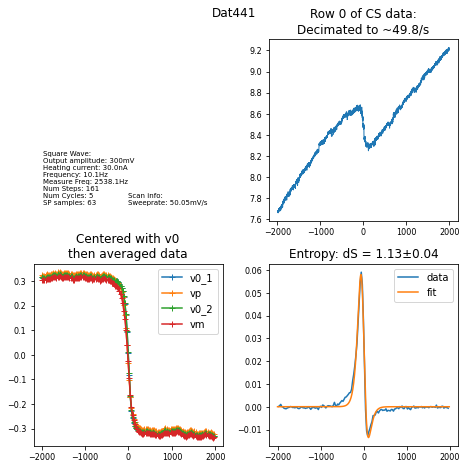

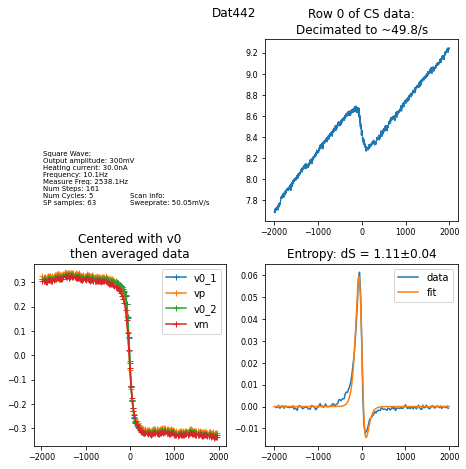

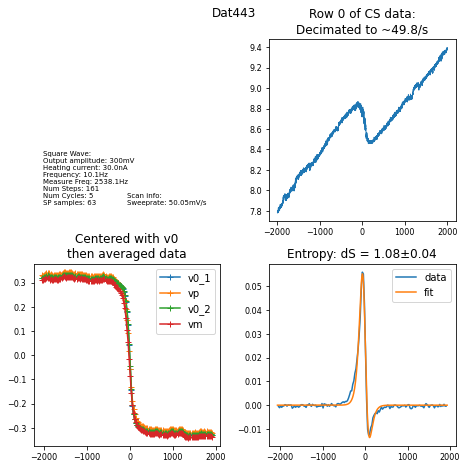

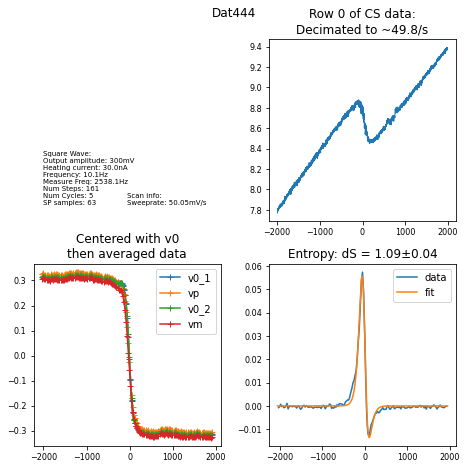

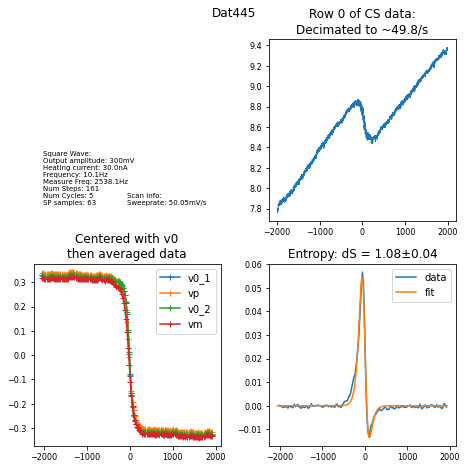

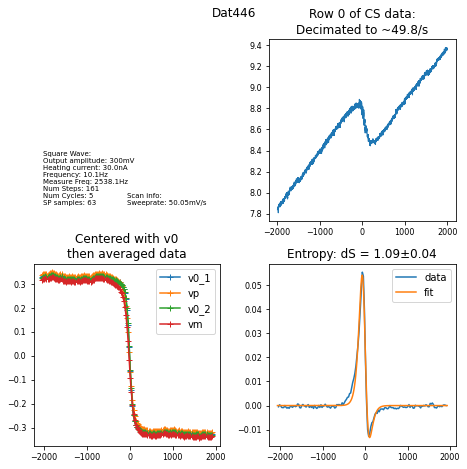

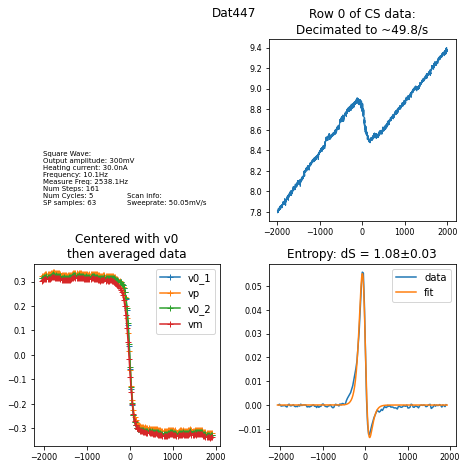

In [48]:
from src.DatObject.Attributes.SquareEntropy import ShowPlots, plot_square_entropy
%matplotlib inline
for dat in dats:
    dat.SquareEntropy.Processed.plot_info.show = ShowPlots(info=True, raw=True, averaged=True, entropy=True)
#     dat.SquareEntropy.update_HDF()
    plot_square_entropy(dat.SquareEntropy.Processed)
    fig = plt.gcf()
    fig.suptitle(f'Dat{dat.datnum}')
    

D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\DatObject\Attributes\DatAttribute.py:168: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



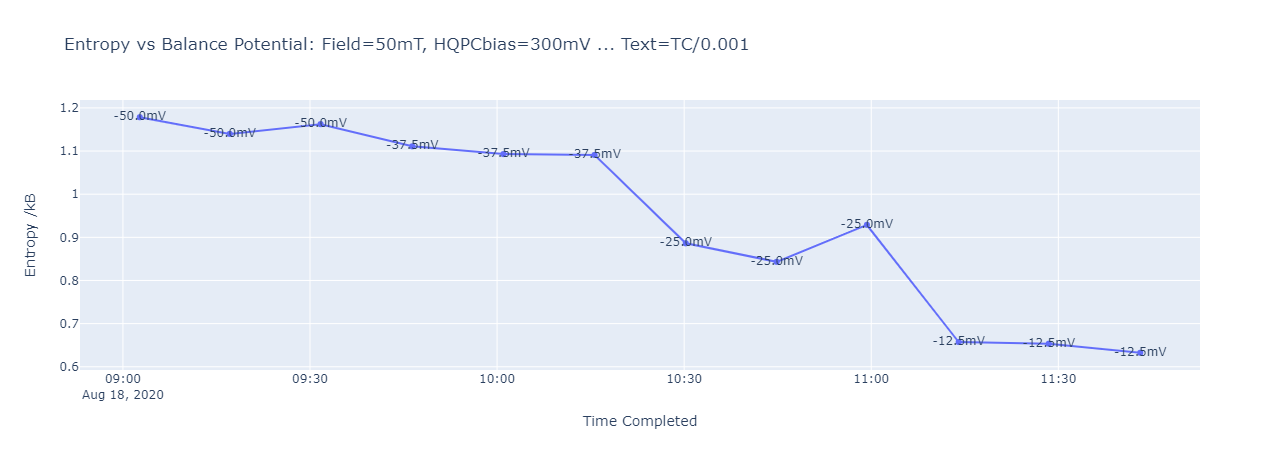

In [41]:
dats = get_dats(range(448, 460))
for dat in dats:
    Fixes._add_magy(dat)  # Adds temporary magy field to Other.magy
dss = [dat.SquareEntropy.Processed.outputs.entropy_fit.best_values.dS for dat in dats]
times = [pd.Timestamp(dat.Logs.time_completed) for dat in dats]

balance_potentials = [dat.AWG.AWs[1][0][1] for dat in dats]
hqpc_bias = dats[0].AWG.AWs[0][0][1]
fixed_field = dats[0].Other.magy.field
import plotly.express as px
fig = px.line(x=times, y=dss, labels={'x': 'Time Completed', 'y': 'Entropy /kB'}, title=f'Entropy vs Balance Potential: Field={fixed_field:.0f}mT, HQPCbias={hqpc_bias:.0f}mV ... Text=TC/0.001', text=[f'{bp:.1f}mV' for bp in balance_potentials])
fig

In [32]:
for dat in dats:
    print(dat.Logs.temps)

TEMPtuple(fiftyk=47.885, fourk=3.8619, mag=4.5716, mc=0.10291, still=0.66722)
TEMPtuple(fiftyk=47.916, fourk=3.8636, mag=4.5648, mc=0.098717, still=0.6696)
TEMPtuple(fiftyk=47.897, fourk=3.875, mag=4.5924, mc=0.10255, still=0.6688)
TEMPtuple(fiftyk=47.874, fourk=3.8646, mag=4.5754, mc=0.096855, still=0.66924)


D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\DatObject\Attributes\DatAttribute.py:168: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



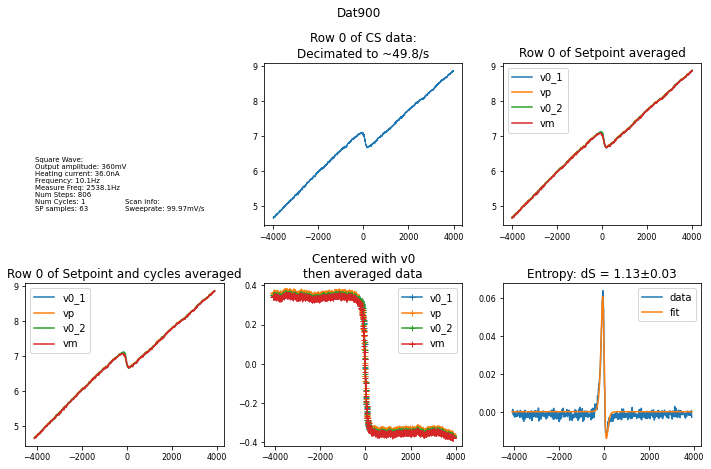

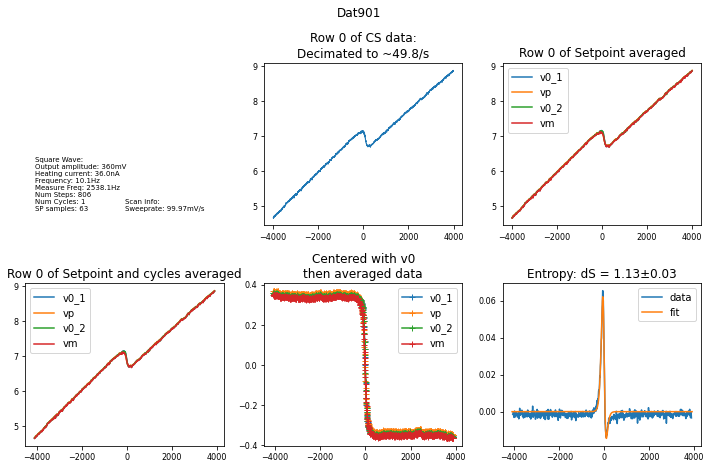

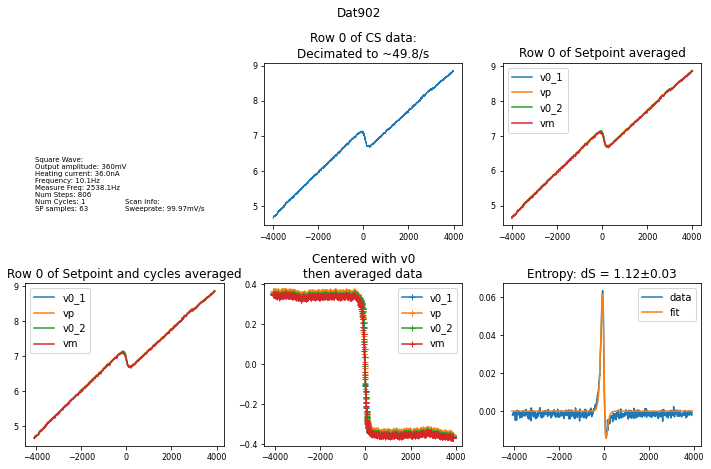

In [49]:
dats = get_dats([900, 901, 902 ])
%matplotlib qt
for dat in dats:
    dat.SquareEntropy.Processed.plot_info.show = ShowPlots(info=True, raw=True, setpoint_averaged=True, cycle_averaged=True, averaged=True, entropy=True)
#     dat.SquareEntropy.update_HDF()
    plot_square_entropy(dat.SquareEntropy.Processed)
    fig = plt.gcf()
    fig.suptitle(f'Dat{dat.datnum}')
    plt.tight_layout()